# Aimes, Iowa Housing Data: Preprocessing and Model Fitting (K Best Selection, Lasso Regression)

We now look at the results of throwing in all terms and using Lasso regression with feature selection ahead of time to compare the terms present.

In [120]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
import patsy
from sklearn.metrics import mean_squared_error
from functools import reduce
from sklearn.neighbors import KNeighborsRegressor

import pickle

In [11]:
fileObj = open('./pickles/housingDF.pkl', 'rb')
housing = pickle.load(fileObj)
fileObj.close()

In [12]:
terms = reduce((lambda x,y: x + ' + ' + y),housing.drop('SalePrice', axis=1).columns)
formula = f'SalePrice ~ {terms} - 1'
y, x = patsy.dmatrices(formula, housing)
x = pd.DataFrame(x, columns=x.design_info.column_names)

In [113]:
model = LassoCV(n_alphas=100, cv=10)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, shuffle=True)



scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

pca = PCA(n_components=80)
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)

ytrain = ytrain.ravel()
ytest = ytest.ravel()

In [114]:
model.fit(xtrain, ytrain)
model.score(xtrain, ytrain), model.score(xtest, ytest)

(0.8902219424733134, 0.8635839715398619)

In [127]:
knn = KNeighborsRegressor(n_neighbors= 15)
knn.fit(xtrain, ytrain)
knn.score(xtrain, ytrain), knn.score(xtest, ytest)

(0.810017449862807, 0.7918912545367267)

In [123]:
mean_squared_error(ytest, model.predict(xtest))**0.5

28827.35093599097

In [128]:
mean_squared_error(ytest, knn.predict(xtest))**0.5

35605.50910595644

This model performs much better, having access to more information.  We can confirm some of the more important terms here.

In [116]:
pd.Series(model.coef_, index=x[k_best.get_support()].columns).abs().sort_values(ascending=False)[:20]

NameError: name 'k_best' is not defined

In [117]:
x.columns.map(lambda x: 'MSSub' in x)

Index([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
       ...
       False, False, False, False, False, False, False, False, False, False],
      dtype='object', length=276)

In [118]:
import matplotlib.pyplot as plt

%matplotlib inline

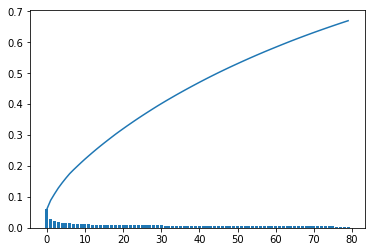

In [119]:
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))

In [103]:
pca.explained_variance_ratio_[0]

0.05841419854027105

In [67]:
component_loadings = pd.DataFrame(pca.components_, columns=x.columns).T

In [69]:
component_loadings.columns = [f'component_{i}' for i in range(1, len(component_loadings.columns)+1)]

In [89]:
component_loadings.sort_values('component_1', ascending=False)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_21,component_22,component_23,component_24,component_25,component_26,component_27,component_28,component_29,component_30
LotArea,0.999066,-0.034955,-0.022330,1.067377e-03,-4.831498e-03,-0.001124,-0.006641,-7.479372e-04,-0.008293,-0.002084,...,0.000030,0.000011,-0.000004,0.000025,-0.000013,-0.000021,-0.000009,-0.000004,-0.000013,-0.000009
GrLivArea,0.030682,0.693576,-0.033102,-2.201996e-01,1.902142e-01,-0.010273,0.216854,2.182966e-02,0.585881,-0.182509,...,-0.000386,-0.000115,-0.000724,0.000487,0.000144,0.000197,-0.000337,-0.000154,0.000078,-0.000564
TotalBsmtSF,0.020738,0.340996,0.448842,4.137618e-01,2.260797e-01,0.022864,0.188858,-2.057122e-01,-0.349419,-0.002733,...,-0.000337,0.000234,-0.000234,0.000139,0.000204,0.000038,0.000260,0.000069,0.000165,0.000063
BsmtFinSF1,0.015373,0.025196,0.705900,-2.422399e-01,2.393363e-01,0.020945,-0.346908,-1.090141e-01,-0.033496,-0.027481,...,-0.000284,0.000085,-0.000099,-0.000013,-0.000048,0.000027,0.000011,-0.000036,0.000010,0.000069
GarageArea,0.011861,0.188169,0.142678,1.389451e-02,-1.562177e-01,-0.005352,0.001285,3.652492e-01,0.113936,0.852269,...,-0.000820,-0.000328,0.000030,-0.000301,0.000712,0.000372,-0.000071,-0.000385,-0.000115,0.000198
GarageYrBlt,0.008480,0.223051,0.258793,-1.131741e-02,-9.098812e-01,0.015494,-0.026838,-1.028593e-01,-0.010914,-0.204416,...,-0.000068,0.000566,-0.000063,-0.000073,-0.000188,-0.000098,0.000064,0.000254,0.000242,-0.000071
WoodDeckSF,0.003842,0.042640,0.046444,-2.368057e-02,1.381917e-02,0.011802,0.091359,2.729703e-02,-0.122518,0.201000,...,-0.000916,0.000461,0.000092,0.000115,-0.000770,-0.000137,-0.000360,-0.000229,-0.000282,-0.000021
MasVnrArea,0.003430,0.113837,0.081364,-6.461301e-03,3.922961e-02,-0.027704,-0.012855,8.717964e-01,-0.284441,-0.367160,...,-0.000616,0.000501,-0.001032,0.000175,-0.000012,-0.000068,0.000411,-0.000448,-0.000026,-0.000172
BsmtFinSF2,0.002805,-0.024758,0.026225,-2.733383e-02,-2.406443e-02,-0.033276,0.815531,-5.709044e-02,-0.251487,0.029237,...,0.000218,0.000330,-0.000120,0.000040,-0.000177,-0.000067,0.000196,-0.000076,0.000009,-0.000051
BsmtUnfSF,0.002560,0.340558,-0.283284,6.833356e-01,1.080788e-02,0.035194,-0.279765,-3.960769e-02,-0.064436,-0.004489,...,-0.000272,-0.000181,-0.000015,0.000113,0.000429,0.000078,0.000053,0.000181,0.000146,0.000045


In [90]:
pd.DataFrame(pca.components_, columns=x.columns).loc[:,x.columns.map(lambda x: 'MSSub' in x)]

,MSSubClass[20],MSSubClass[30],MSSubClass[40],MSSubClass[45],MSSubClass[50],MSSubClass[60],MSSubClass[70],MSSubClass[75],MSSubClass[80],MSSubClass[85],MSSubClass[90],MSSubClass[120],MSSubClass[150],MSSubClass[160],MSSubClass[180],MSSubClass[190]
0,0.000019,-0.000003,-2.159930e-07,-6.610087e-07,-2.454934e-06,0.000008,-1.229377e-06,3.600062e-07,8.251080e-07,-5.032317e-07,-6.355677e-07,-0.000010,-2.054454e-07,-0.000010,-1.032224e-06,0.000002
1,-0.000191,-0.000086,-1.454821e-06,-8.523719e-06,3.236054e-07,0.000319,1.202747e-05,1.365364e-05,-3.053673e-05,-2.520724e-05,4.806074e-06,0.000012,3.449366e-07,0.000008,-6.936745e-06,-0.000021
2,0.000331,-0.000037,-9.324410e-07,-4.323212e-06,-9.986194e-05,-0.000144,-7.508939e-05,-1.531846e-05,6.765955e-07,1.886101e-05,-1.893783e-05,0.000097,-1.937027e-07,-0.000025,-5.512524e-07,-0.000026
3,0.000401,0.000038,7.563095e-07,6.183634e-06,-3.615501e-05,-0.000318,-4.881109e-05,-8.490359e-06,-2.543644e-05,-1.519489e-05,1.425230e-05,0.000071,-2.192635e-06,-0.000049,-5.230532e-06,-0.000023
4,-0.000037,0.000011,-2.120831e-06,-1.763861e-06,-2.980102e-06,-0.000039,-4.035435e-06,5.587475e-06,-4.010908e-05,-1.579608e-05,7.097185e-05,-0.000009,-6.295426e-07,-0.000023,8.778651e-06,0.000080
5,0.000072,-0.000020,6.532976e-06,-2.361158e-06,4.202477e-06,-0.000029,-1.381215e-07,-6.206978e-06,1.493924e-05,-1.006013e-05,-1.555774e-05,-0.000003,-6.427392e-07,-0.000031,-2.861567e-06,0.000023
6,0.000263,-0.000047,1.650362e-06,-2.993588e-06,-3.730014e-05,-0.000173,-5.212734e-05,-5.575942e-07,5.374043e-05,-4.291376e-06,2.050401e-05,0.000044,6.769577e-07,-0.000037,-6.077078e-06,-0.000024
7,0.000164,0.000027,-7.632604e-06,-2.502040e-06,-2.466429e-04,0.000031,-1.530223e-04,-3.718408e-05,8.783090e-05,3.942100e-05,4.202869e-05,-0.000067,3.352837e-08,0.000151,-1.532095e-07,-0.000028
8,0.000223,0.000027,6.033352e-07,-6.407770e-06,-6.426592e-06,-0.000591,-1.043042e-05,4.250892e-05,1.112277e-04,6.203712e-06,2.481984e-04,0.000147,8.884849e-06,-0.000187,-1.045050e-05,-0.000004
9,-0.000045,-0.000069,-1.446388e-05,-1.866459e-06,-2.570234e-04,0.000347,-6.452497e-05,-4.283699e-06,-5.316559e-06,7.061934e-05,4.069677e-05,-0.000003,1.022363e-06,-0.000068,1.147475e-05,0.000062


In [91]:
scores = cross_val_score(model, xtrain, ytrain.ravel(), cv=10)
np.mean(scores), np.std(scores)

(0.7984641087486246, 0.026358217078839213)

We can try and see if adding interactions I think are relevant might improve the score.

In [21]:
interactions = 'GrLivArea:OverallQual'
formula = f'SalePrice ~ {terms} + {interactions} - 1'
y, x = patsy.dmatrices(formula, housing)
x = pd.DataFrame(x, columns=x.design_info.column_names)

In [25]:
model = LassoCV(n_alphas=100, cv=10)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, shuffle=True)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [29]:
model.fit(xtrain, ytrain.ravel())
model.score(xtrain, ytrain), model.score(xtest, ytest)

(0.9483806818554631, 0.921052054879546)

In [27]:
scores = cross_val_score(model, xtrain, ytrain.ravel(), cv=10)
np.mean(scores), np.std(scores)

(0.922529021226018, 0.01649240846022595)

No change on a scale we would care about.